<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/Logisitic_Regression_and_DT_Practical_11_August.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **For Colab users, to read the data.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


### **1. Import the required packages.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#packages for machine learning related tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#packages for Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### **2. Reading and Exploring the Data**

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes  #check the datatype of each column

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()   #check the number of missing values column-wise

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.shape

(303, 14)

In [ ]:
data.duplicated().sum()   #count and print the total number of duplicate rows

1

In [ ]:
data[data.duplicated()]  #print the duplicate rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data.drop_duplicates(inplace = True)  #drop all the duplicate rows

In [ ]:
#data.drop_duplicates(subset = ['trestbps', 'fbs'], inplace = True)

### **Checking for the Outliers**

When we are working with Linear Algorithms like Linear Regression, Logistic Regression, SVM etc then it is important to check and remove the outliers. But in case if you are working with Tree Based Algorithms which are Decision Trees, Random Forest and Boosting Algorithm then in that case you dont have to remove outlier because they work well with outliers also.

In [ ]:
data.describe()  #statistical Summary of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Let's remove the outlier from the `chol` column

In [ ]:
q1 = data['chol'].quantile(0.25)
q3 = data['chol'].quantile(0.75)

In [ ]:
iqr = q3 - q1
iqr

63.75

In [ ]:
LB = q1 - 1.5 * iqr
UB = q3 + 1.5 * iqr

In [ ]:
print(LB, UB)

115.375 370.375


In [ ]:
data = data[(data['chol'] >= LB) & (data['chol'] <= UB)]

In [ ]:
data.shape

(297, 14)

In [ ]:
def remove_outlier(data):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  iqr = q3 - q1

  #define the lower and upper boundary
  LB = q1 - 1.5 * iqr
  UB = q3 + 1.5 * iqr

  #code for removing outliers here
  data = data[(data[col] >= LB) & (data[col] <= UB)]

### **Machine Learning Process**

In [ ]:
X = data.drop(columns = 'target')  # or data.drop('target', axis = 1)
y = data['target']

#### **Splitting the data into training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### **Apply the Logistic Regression on the data**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8333333333333334

### **Apply Decision Tree Classifier on the data**

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

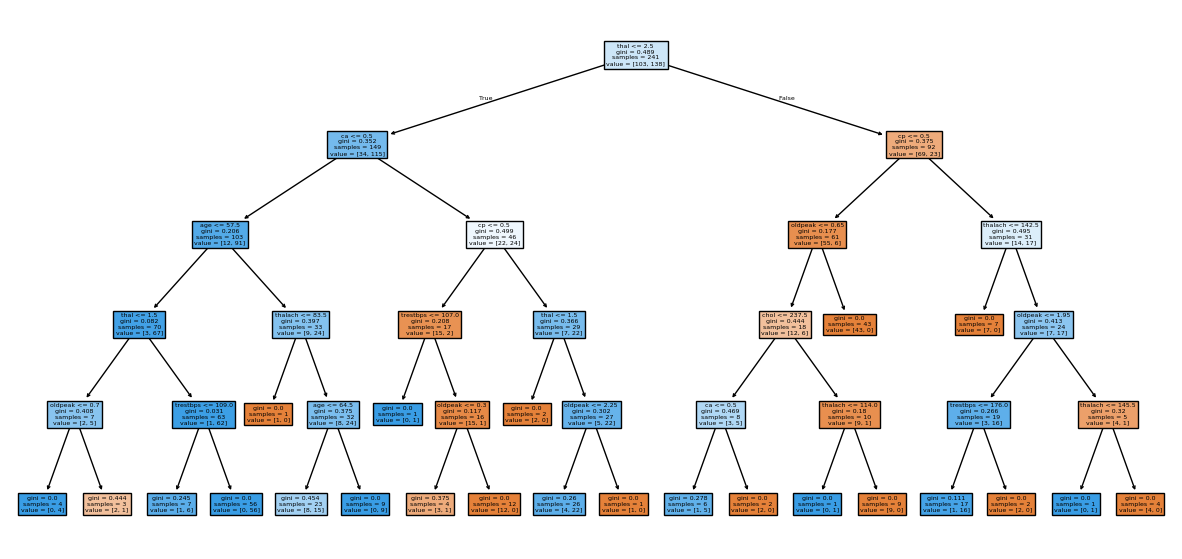

In [ ]:
fig = plt.figure(figsize = (15,7))

fig = tree.plot_tree(dt, feature_names = X.columns, filled = True)
plt.show()

In [ ]:
dt.get_depth()

5

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7868852459016393

#### **To check for overfitting**

In [ ]:
y_pred_train = dt.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9294605809128631

### Performance Metrics used in Classification Models

1. **`Confusion Matrix`** : A confusion matrix is a table that summarizes the performance of a classification model by showing the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

    - **`When to Use`**: The confusion matrix is useful for understanding the types of errors the model is making and for calculating other metrics like precision, recall, and specificity.
    
![confusion_matrix](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/8_confusion-matrix-python.jpg)

---

2. **`Precision Score`** : Precision is important when the cost of false positives is high, so false positives must be reduced.
    - `For example` :
        - In spam detection, a high precision ensures that most of the emails marked as spam are indeed spam and genuine emails are not marked as spam since it can be a serious problem.
        - In financial fraud detection system, it might prioritize high precision – minimizing false positives (wrongly declined transactions) to avoid inconveniencing customers.
        - While classifying whether or not a bank customer is a loan defaulter, it is desirable to have high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.

---

3. **`Recall Score/Sensitivity`** : Recall is crucial when the cost of false negatives is high and we need to eliminate false negatives as much as possible.
    - `For Example`:
        - In medical diagnosis, a high recall is crucial since it ensures that most of the actual positive cases (e.g., diseases) are identified. False Negative would mean that we classified a patient as a healthy person which would be fatal.

---

4. **`Accuracy Score`** : It is suitable to use when the classes in the dataset are balanced. It provides a straightforward measure of overall correctness. However, it can be misleading in cases of class imbalance, where one class significantly outnumbers the other.

    - Using accuracy as a defining metric for our model makes sense intuitively, but more often than not, it is advisable to use Precision and Recall too. There might be other situations where our accuracy is very high, but our precision or recall is low. Ideally, for our model, we would like to avoid any situations where the patient has heart disease, but our model classifies as him not having it, i.e., aim for high recall.

    - On the other hand, for the cases where the patient is not suffering from heart disease and our model predicts the opposite, we would also like to avoid treating a patient with no heart disease (crucial when the input parameters could indicate a different ailment, but we end up treating him/her for a heart ailment).

    - Although we do aim for high precision and high recall value, achieving both at the same time is not possible. For example, if we change the model to one giving us a high recall, we might detect all the patients who actually have heart disease, but we might end up giving treatments to many patients who don’t suffer from it.

    - Similarly, suppose we aim for high precision to avoid giving any wrong and unrequired treatment. In that case, we end up getting a lot of patients who actually have heart disease going without any treatment.

---

5. **`F1 Score`** : We saw above that there is a trade-off between recall and precision-score. When we try to increase one, the other one starts to reduce. But sometime both the score are important.
    - `Ex`:  if the doctor informs us that the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, then we would aim for not only a high recall but a high precision as well.
    
---


6. **`ROC_AUC Score`** - Used commonly with imbalanced data.

---

7. **`Specificity`** : Specificity is a performance metric used in classification models, particularly in binary classification. It is also known as the true negative rate. Specificity measures the proportion of actual negative cases that are correctly identified by the model. This metric tells us how well the model is at identifying negative instances.
    - `Ex` : In medical testing, a high specificity is important when a false positive result could lead to unnecessary stress, further invasive testing, or treatment. For example, in cancer screening, a test with high specificity ensures that healthy individuals are not incorrectly diagnosed with cancer, avoiding unnecessary biopsies or treatments

### **Apply Random Forest Classifier on the Data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=60, max_depth = 4)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=60)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.819672131147541

### **To check for the overfitting in random forest**

In [ ]:
y_pred_train = rf_classifier.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9128630705394191

In [ ]:
n_estimator = [40, 50, 60, 70, 80, 90,100],
max_depth = [3,4,5,6,7]